<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioperezA01793880/blob/main/Actividad_semana_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz

A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#B= B=W*D*Winv
#Usamosla funcion dot de numpy para multiplicar matrices
B = np.dot(np.dot(W,D),Winv)
B1 = np.dot(W,D)
B2 = Winv
BFinal= np.dot(B1,B2)
#print(B)
#usamos el redondeo y el real, para evitar que nos de el punto despues del numero
#Nos da un numero real redondeado pero solamente entero.
print(B.round(0).real.astype(int))
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------


In [ ]:
#Función para descomposición
#para hacer mas rapido todo el rollo, creamos una funcion que replique el procedimiento
def descompositor (Matriz_original):
  A = Matriz_original
  print("-------Matriz original-------")
  print(A)
  print("-----------------------------")
#------------ la eigendescomposición
  values, vectors = eig(A)
  print(values) #D
  print(vectors) #W
#------------------------Reconstrucción
  values, vectors = np.linalg.eig(A)
  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)

  print("-------Matriz reconstruida-------")
  B = np.dot(np.dot(W,D),Winv)
  #print(B)
  print(B.round(0).real.astype(int))
  print("-----------------------------")

In [ ]:
#Matriz 1
#Definmos nuestra matriz a tratar
A=([[3,0,2],[3,0,-2],[0,1,1]])
#Llamamos la funcion para que cumpla el ejercicio
descompositor(A)

-------Matriz original-------
[[3, 0, 2], [3, 0, -2], [0, 1, 1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------


In [ ]:
#Matriz 2
A=([[1,3,8],[2,0,0],[0,0,1]])
descompositor(A)

-------Matriz original-------
[[1, 3, 8], [2, 0, 0], [0, 0, 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


In [ ]:
#Matriz 3
A=([[5,4,0],[1,0,1],[10,7,1]])
descompositor(A)

-------Matriz original-------
[[5, 4, 0], [1, 0, 1], [10, 7, 1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


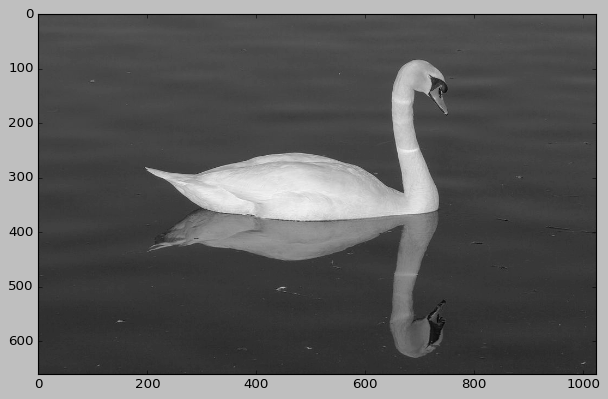

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB021DDDC10>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
#Aqui vamos a pegar el link de nuestra imagen que vamos a utilizar
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
#La función convert, regresa una copia de la imagen con las caracteristicas que pongas en el argumento
#Esta es la explciación de porque el LA
"""L : This image mode has one channel that can take any value between 0 and 255 representing white, black and all the shades of gray in between. It’s an 8-bit grayscale image mode. L stands for Luminance channel.
LA : Represents L with Alpha transparency channel. This mode can be used to achieve grayscale images with transparency. And don’t forget only png and gif image file types support transparency channel.
1 : This image mode is true black & white. It only has one channel which takes only two value representing full white or full black. There is no in between meaning no gray."""
imggray = img.convert('LA')
#convertimos los datos de la imagen a un arreglo de datos
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
#Ahora convertimos el arreglo de datos que nos regreso de la imagen a un solo arreglo unidimensional
imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
#La funcionn linalg.svd, devuelve una descomposicion de un solo valor o single value decomposition En especifico, 
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
#el .shape (), Nos dice el tamaño del arreglo
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

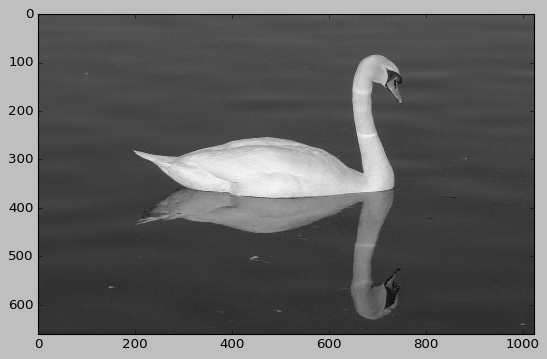

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[ 67.  67.  67. ... 103. 129. 194.]


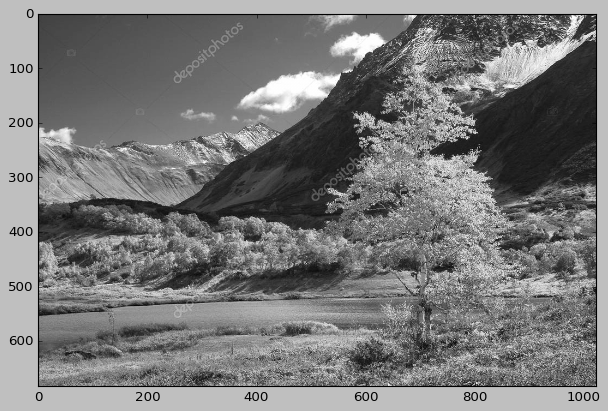

In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://st.depositphotos.com/2800305/3789/i/950/depositphotos_37892659-stock-photo-beautiful-landscape-on-kamchatka-mountains.jpg')).convert('LA')

imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()



In [ ]:
# IMAGEN 1
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(682, 1023)

In [ ]:
# IMAGEN 1
U.shape

(682, 682)

In [ ]:
# IMAGEN 1
V.shape

(1023, 1023)

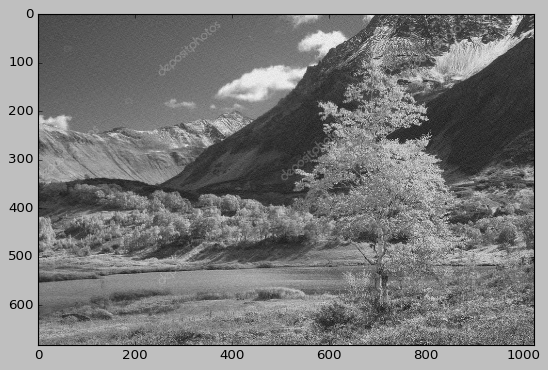

Felicidades la imagen está comprimida


In [ ]:
#IMAGEN 1
nvalue = 250

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[31. 28. 30. ... 19. 19. 19.]


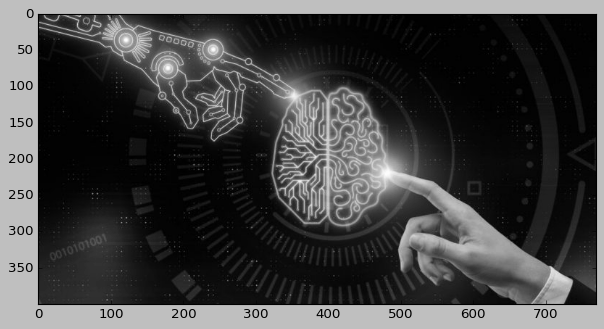

In [61]:
#imagen 2X
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://grupoinmotion.com/wp-content/uploads/2020/12/inteligencia-artificial-770x400.jpg')).convert('LA')

imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()


In [63]:
# IMAGEN 2
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(400, 770)

In [64]:
# IMAGEN 2
U.shape

(400, 400)

In [67]:
# IMAGEN 2
V.shape

(770, 770)

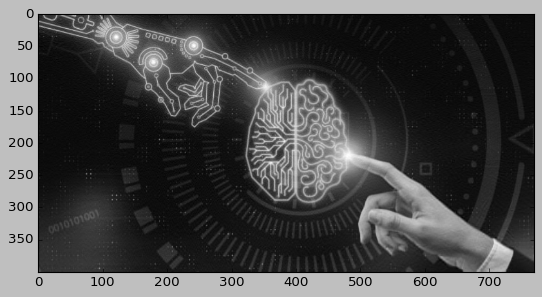

Felicidades la imagen está comprimida


In [71]:
#IMAGEN 2
nvalue = 150

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[250. 250. 250. ... 248. 248. 248.]


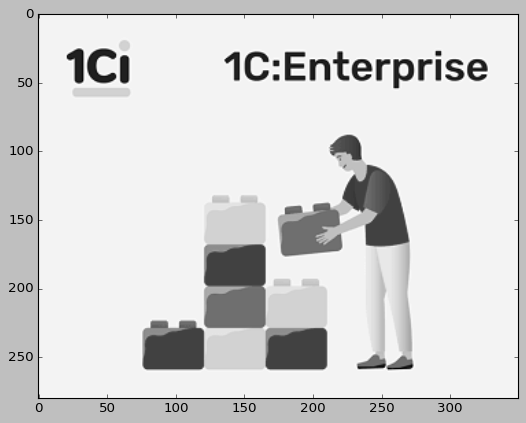

In [76]:
#imagen 3
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://d2sbaogcozkhdh.cloudfront.net/assets/prod/uploads/1660006956119-1C_Enterprise.png')).convert('LA')

imggray = img.convert('LA')

imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)
imgmat.shape = (imggray.size[1],imggray.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()


In [77]:
# IMAGEN 3
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(280, 350)

In [78]:
# IMAGEN 3
U.shape

(280, 280)

In [79]:
# IMAGEN 3
V.shape

(350, 350)

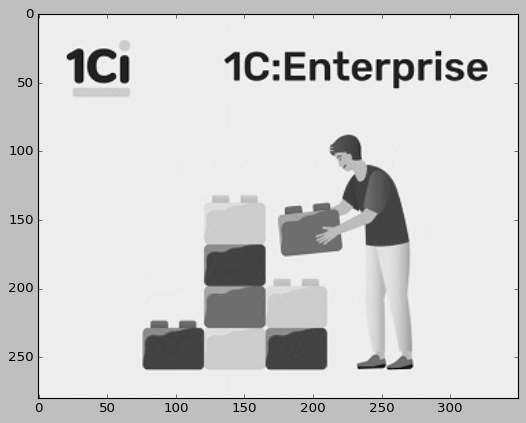

Felicidades la imagen está comprimida


In [81]:
#IMAGEN 3
nvalue = 100

reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [82]:
#tu codigo aqui
#se realiza importación de librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) 

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 